<a href="https://colab.research.google.com/github/RavitejaMandalapu/vcube--assignment/blob/main/cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Training data:", X_train.shape, y_train.shape)
print("Testing data:", X_test.shape, y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data: (50000, 32, 32, 3) (50000, 1)
Testing data: (10000, 32, 32, 3) (10000, 1)


In [3]:
# Normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# Check null values
print("Nulls in X_train:", np.isnan(X_train).sum())
print("Nulls in X_test:", np.isnan(X_test).sum())

# Remove null values if any (safety step)
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


Nulls in X_train: 0
Nulls in X_test: 0


In [4]:
base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(32, 32, 3)
)

# Freeze VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
output = Dense(10, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [5]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 541s 863ms/step - accuracy: 0.4465 - loss: 1.5821 - val_accuracy: 0.5559 - val_loss: 1.2648
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 559s 859ms/step - accuracy: 0.5754 - loss: 1.2098 - val_accuracy: 0.5760 - val_loss: 1.2154
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 537s 860ms/step - accuracy: 0.5983 - loss: 1.1474 - val_accuracy: 0.5951 - val_loss: 1.1596
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 536s 857ms/step - accuracy: 0.6209 - loss: 1.0851 - val_accuracy: 0.6002 - val_loss: 1.1577
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 490s 784ms/step - accuracy: 0.6307 - loss: 1.0564 - val_accuracy: 0.5941 - val_loss: 1.1651
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 546s 855ms/step - accuracy: 0.6446 - loss: 1.0117 - val_accuracy: 0.6164 - val_loss: 1.1116
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 550s 881ms/step - accuracy: 0.6542 - loss: 0.9747 - val_accuracy: 0.6102 - val_loss: 1.1297
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 558s 874ms/step - accuracy: 0.6768 -

In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 105s 334ms/step - accuracy: 0.6181 - loss: 1.1077
Test Accuracy: 0.6154000163078308
Test Loss: 1.1185657978057861


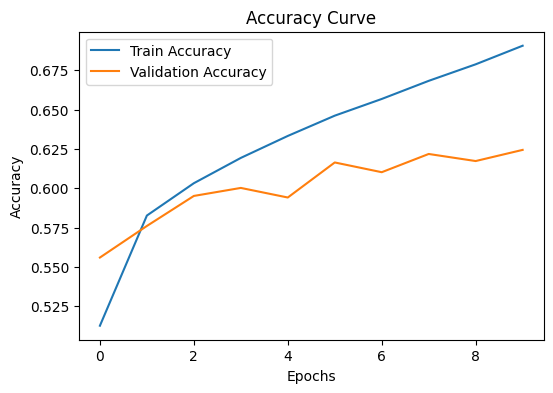

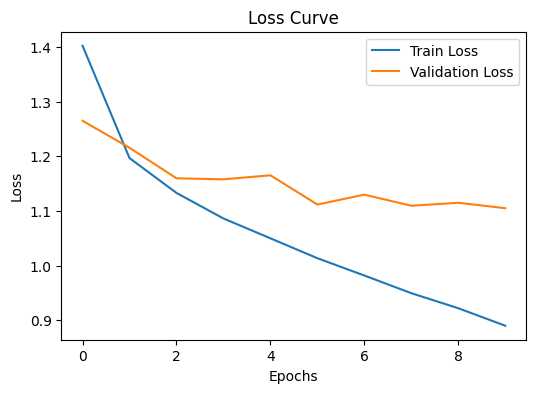

In [7]:
# Accuracy Curve
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

# Loss Curve
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 355ms/step


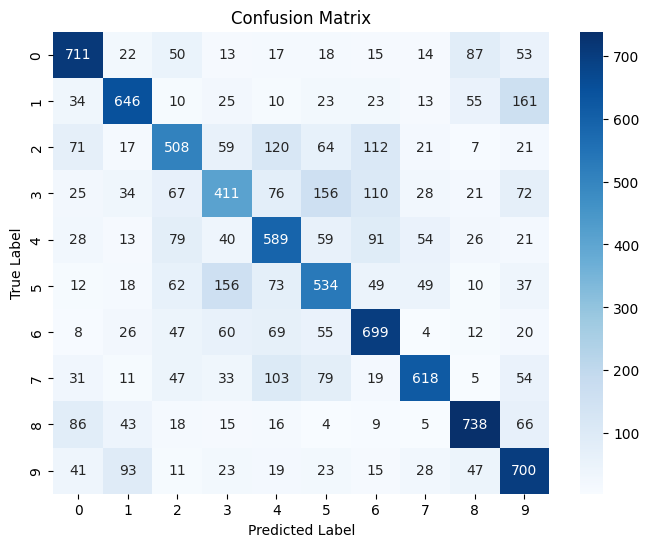

In [8]:
# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
